# Graphing

Read in data from url

In [13]:
%autosave 30
import pandas as pd
import matplotlib.pyplot as plt

Autosaving every 30 seconds


In [15]:
budget = pd.read_csv("http://pbpython.com/extras/mn-budget-detail-2014.csv")
budget = budget.sort_values('amount',ascending=False)[:10]
budget.head()

,category,detail,amount
46,ADMINISTRATION,Capitol Renovation and Restoration Continued,126300000
1,UNIVERSITY OF MINNESOTA,Minneapolis; Tate Laboratory Renovation,56700000
78,HUMAN SERVICES,Minnesota Security Hospital - St. Peter,56317000
0,UNIVERSITY OF MINNESOTA,Higher Education Asset Preservation (HEAPR) 1,42500000
5,MINNESOTA STATE COLLEGES AND UNIVERSITIES,Higher Education Asset Preservation (HEAPR) 2,42500000


Now, setup our display to use nicer defaults and create a bar plot:

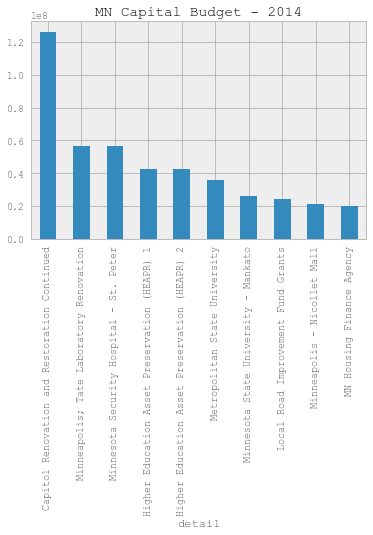

In [19]:
plt.style = 'default'
budget_plot = budget.plot(kind="bar",x=budget["detail"],
                          title="MN Capital Budget - 2014",
                          legend=False)

This does all of the heavy lifting of creating the plot using the “detail” column as well as displaying the title and removing the legend.

Here is the additional code needed to save the image as a png.

In [20]:
fig = budget_plot.get_figure()
fig.savefig("2014-mn-capital-budget.png")

# Seaborn

Seaborn is a visualization library based on matplotlib. It seeks to make default data visualizations much more visually appealing. It also has the goal of making more complicated plots simpler to create. It does integrate well with pandas.

My example does not allow seaborn to significantly differentiate itself. One thing I like about seaborn is the various built in styles which allows you to quickly change the color palettes to look a little nicer. Otherwise, seaborn does not do a lot for us with this simple chart.

Standard imports and read in the data:

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

budget = pd.read_csv("http://pbpython.com/extras/mn-budget-detail-2014.csv")
budget = budget.sort_values('amount',ascending=False)[:10]

One thing I found out is that I explicitly had to set the order of the items on the x_axis using order

This section of code sets the order, and styles the plot and bar chart colors:

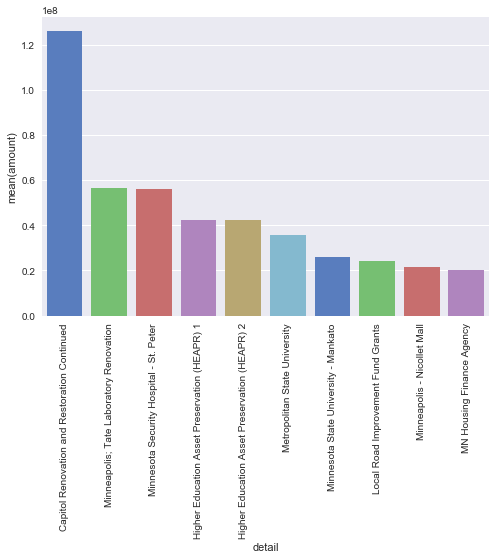

In [23]:
sns.set_style("darkgrid")
bar_plot = sns.barplot(x=budget["detail"],y=budget["amount"],
                        palette="muted",
                        order=budget["detail"].tolist())
plt.xticks(rotation=90)
plt.show()

# Pygal

Pygal is used for creating svg charts. If the proper dependencies are installed, you can also save a file as a png. The svg files are pretty useful for easily making interactive charts. I also found that it was pretty easy to create unique looking and visually appealing charts with this tool.

Do our imports and read in the data:

In [46]:
import pandas as pd
import pygal
from pygal.style import LightStyle

budget = pd.read_csv("http://pbpython.com/extras/mn-budget-detail-2014.csv")
budget = budget.sort_values('amount',ascending=False)[:10]

We need to create the type of chart and do some basic settings

In [47]:
bar_chart = pygal.Bar(style=LightStyle, width=800, height=600,
                      legend_at_bottom=True, human_readable=True,
                      title='MN Capital Budget - 2014')

One interesting feature to note is human_readable which does a nice job of formatting the data so that it mostly “just works.”

Now we need to add the data to our chart. This is where the integration with pandas is not very tight but I found it straightforward to do for this small data set. Performance might be an issue when there are lots of rows.

In [48]:
for index, row in budget.iterrows():
    bar_chart.add(row["detail"], row["amount"])

Now render the file as an svg

In [50]:
bar_chart.render_to_file('budget.svg')

I think the svg presentation is really nice and I like how the resulting graph has a unique, visually pleasing style. I also found it relatively easy to figure out what I could and could not do with the tool. I encourage you to download the svg file and look at it in your browser to see the interactive nature of the graph.

# Plot.ly

Plot.ly is differentiated by being an online tool for doing analytics and visualization. It has a robust API and includes one for python. Browsing the website, you’ll see that there are lots of very rich, interactive graphs. Thanks to the excellent documentation, creating the bar chart was relatively simple.

You’ll need to follow the docs to get your API key set up. Once you do, it all seems to work pretty seamlessly. The one caveat is that everything you are doing is posted on the web so make sure you are ok with it. There is an option to keep plots private so you do have control over that aspect.

Plotly integrates pretty seamlessly with pandas. I also will give them kudos for being very responsive to an email question I had. I appreciate their timely reply.

Setup my imports and read in the data

In [52]:
import plotly 
plotly.tools.set_credentials_file(username='AmberMusing', api_key='RVUFoU1N2gynW39bRlem')

In [54]:
import plotly.plotly as py
import pandas as pd
from plotly.graph_objs import *

budget=pd.read_csv("http://pbpython.com/extras/mn-budget-detail-2014.csv")
budget.sort_values('amount',ascending=False,inplace=True)
budget = budget[:10]

Setup the data and chart type and layout information for plotly.

In [56]:
data = Data([
    Bar(
        x=budget["detail"],
        y=budget["amount"]
    )
])

layout = Layout(
    title='2014 MN Capital Budget',
    font=Font(
        family='Raleway, sans-serif'
    ),
    showlegend=False,
    xaxis=XAxis(
        tickangle=-45
    ),
    bargap=0.05
)

Finally, plot the data. This will open up a browser and take you to your finished plot. I originally didn’t see this but you can save a local copy as well, using py.image.save_as . This is a really cool feature. You get the interactivity of a rich web-based report as well as the ability to save a local copy to for embedding in your documents.

In [57]:
fig = Figure(data=data, layout=layout)
plot_url = py.plot(data,filename='MN Capital Budget - 2014')
py.image.save_as(fig, 'mn-14-budget.png')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~AmberMusing/0 or inside your plot.ly account where it is named 'MN Capital Budget - 2014'


# Summary

Plotting data in the python ecosystem is a good news/bad news story. The good news is that there are a lot of options. The bad news is that there are a lot of options. Trying to figure out which ones works for you will depend on what you’re trying to accomplish. To some degree, you need to play with the tools to figure out if they will work for you. I don’t see one clear winner or clear loser.

Here are a few of my closing thoughts:

    Pandas is handy for simple plots but you need to be willing to learn matplotlib to customize.
    Seaborn can support some more complex visualization approaches but still requires matplotlib knowledge to tweak. The color schemes are a nice bonus.
    ggplot has a lot of promise but is still going through growing pains.
    bokeh is a robust tool if you want to set up your own visualization server but may be overkill for the simple scenarios.
    pygal stands alone by being able to generate interactive svg graphs and png files. It is not as flexible as the matplotlib based solutions.
    Plotly generates the most interactive graphs. You can save them offline and create very rich web-based visualizations.

As it stands now, I’ll continue to watch progress on the ggplot landscape and use pygal and plotly where interactivity is needed.